In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [66]:
rand_state=1000

In [72]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon1.txt') 

In [73]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli1Polygon1.csv', index=None)

In [74]:
df = pd.read_table('AOI_hitStimuli1Polygon1.csv')

In [75]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon1
0,Skilled,612,325,699,615,329,1
1,Skilled,609,325,699,615,329,1
2,Skilled,611,321,699,615,329,1
3,Skilled,611,324,699,615,329,1
4,Skilled,610,327,699,615,329,1


In [76]:
df.nunique()

Skill_level                    2
Gaze_point_X                 836
Gaze_point_Y                 850
Gaze_event_duration          131
Fixation_point_X             491
Fixation_point_Y             466
AOI_hit_Stimuli1_Polygon1      2
dtype: int64

In [77]:
df.info

<bound method DataFrame.info of       Skill_level  Gaze_point_X  Gaze_point_Y  Gaze_event_duration  \
0         Skilled           612           325                  699   
1         Skilled           609           325                  699   
2         Skilled           611           321                  699   
3         Skilled           611           324                  699   
4         Skilled           610           327                  699   
...           ...           ...           ...                  ...   
28059      Novice           535           381                 1048   
28060      Novice           540           381                 1048   
28061      Novice           539           388                 1048   
28062      Novice           537           386                 1048   
28063      Novice           538           378                 1048   

       Fixation_point_X  Fixation_point_Y  AOI_hit_Stimuli1_Polygon1  
0                   615               329               

In [78]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli1_Polygon1    0
dtype: int64

In [79]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon1
count,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000,28064.000000
mean,641.027259,301.309008,814.581564,641.770560,301.058331,0.177166
std,180.952162,158.314351,838.125717,180.162423,157.974624,0.381816
min,217.000000,-145.000000,66.000000,246.000000,-140.000000,0.000000
25%,500.000000,195.000000,266.000000,498.000000,193.000000,0.000000
50%,598.000000,263.000000,482.000000,599.000000,263.000000,0.000000
75%,775.000000,386.000000,1015.000000,777.000000,387.000000,0.000000
max,1242.000000,1628.000000,3861.000000,1238.000000,1584.000000,1.000000


<Figure size 600x400 with 0 Axes>

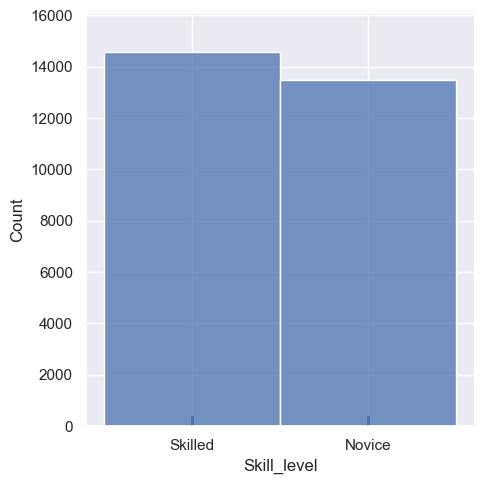

In [80]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [81]:
ordinal_categoricals = ['Skill_level']

In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [83]:
enc = OrdinalEncoder()

In [84]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [85]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon1
0,1.0,612,325,699,615,329,1
1,1.0,609,325,699,615,329,1
2,1.0,611,321,699,615,329,1
3,1.0,611,324,699,615,329,1
4,1.0,610,327,699,615,329,1


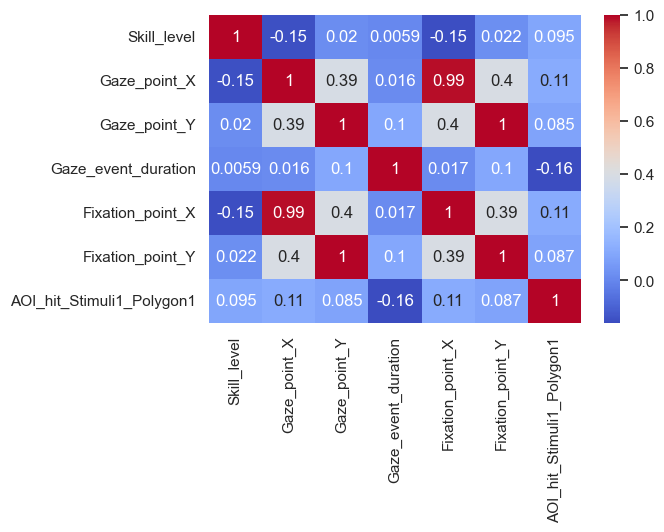

In [86]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 8.27 s
Wall time: 8.26 s


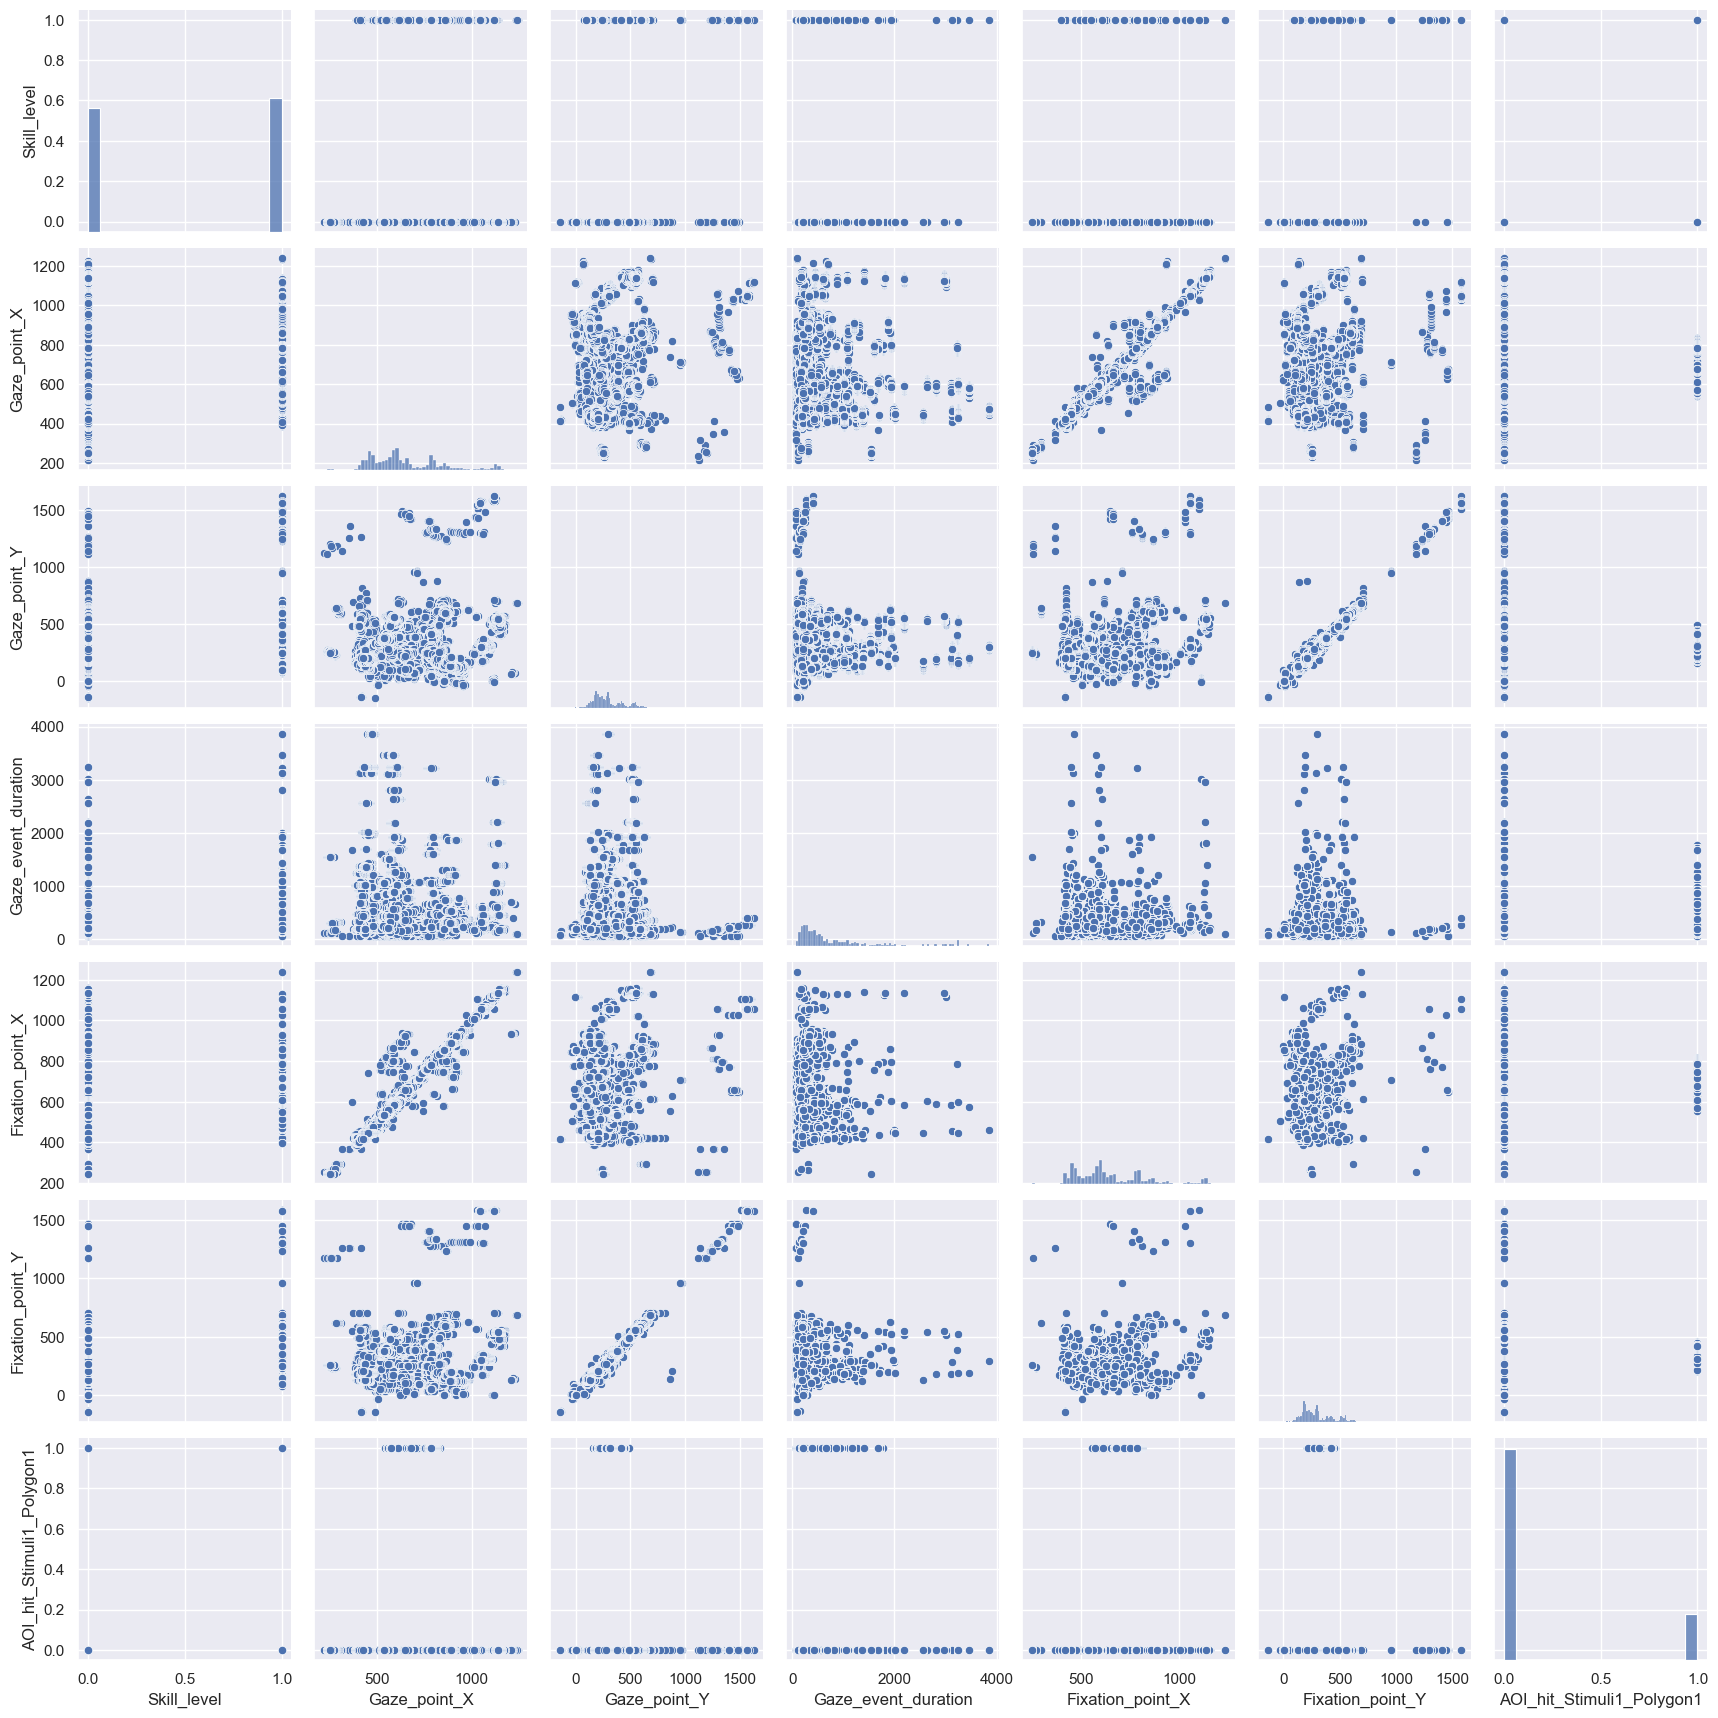

In [88]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli1_Polygon1' ]])

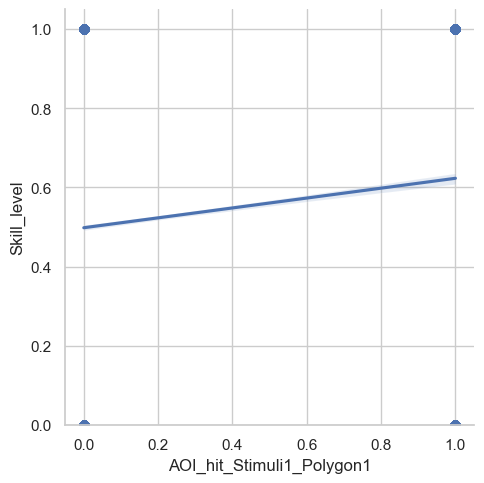

In [91]:
g= sns.lmplot(x='AOI_hit_Stimuli1_Polygon1', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

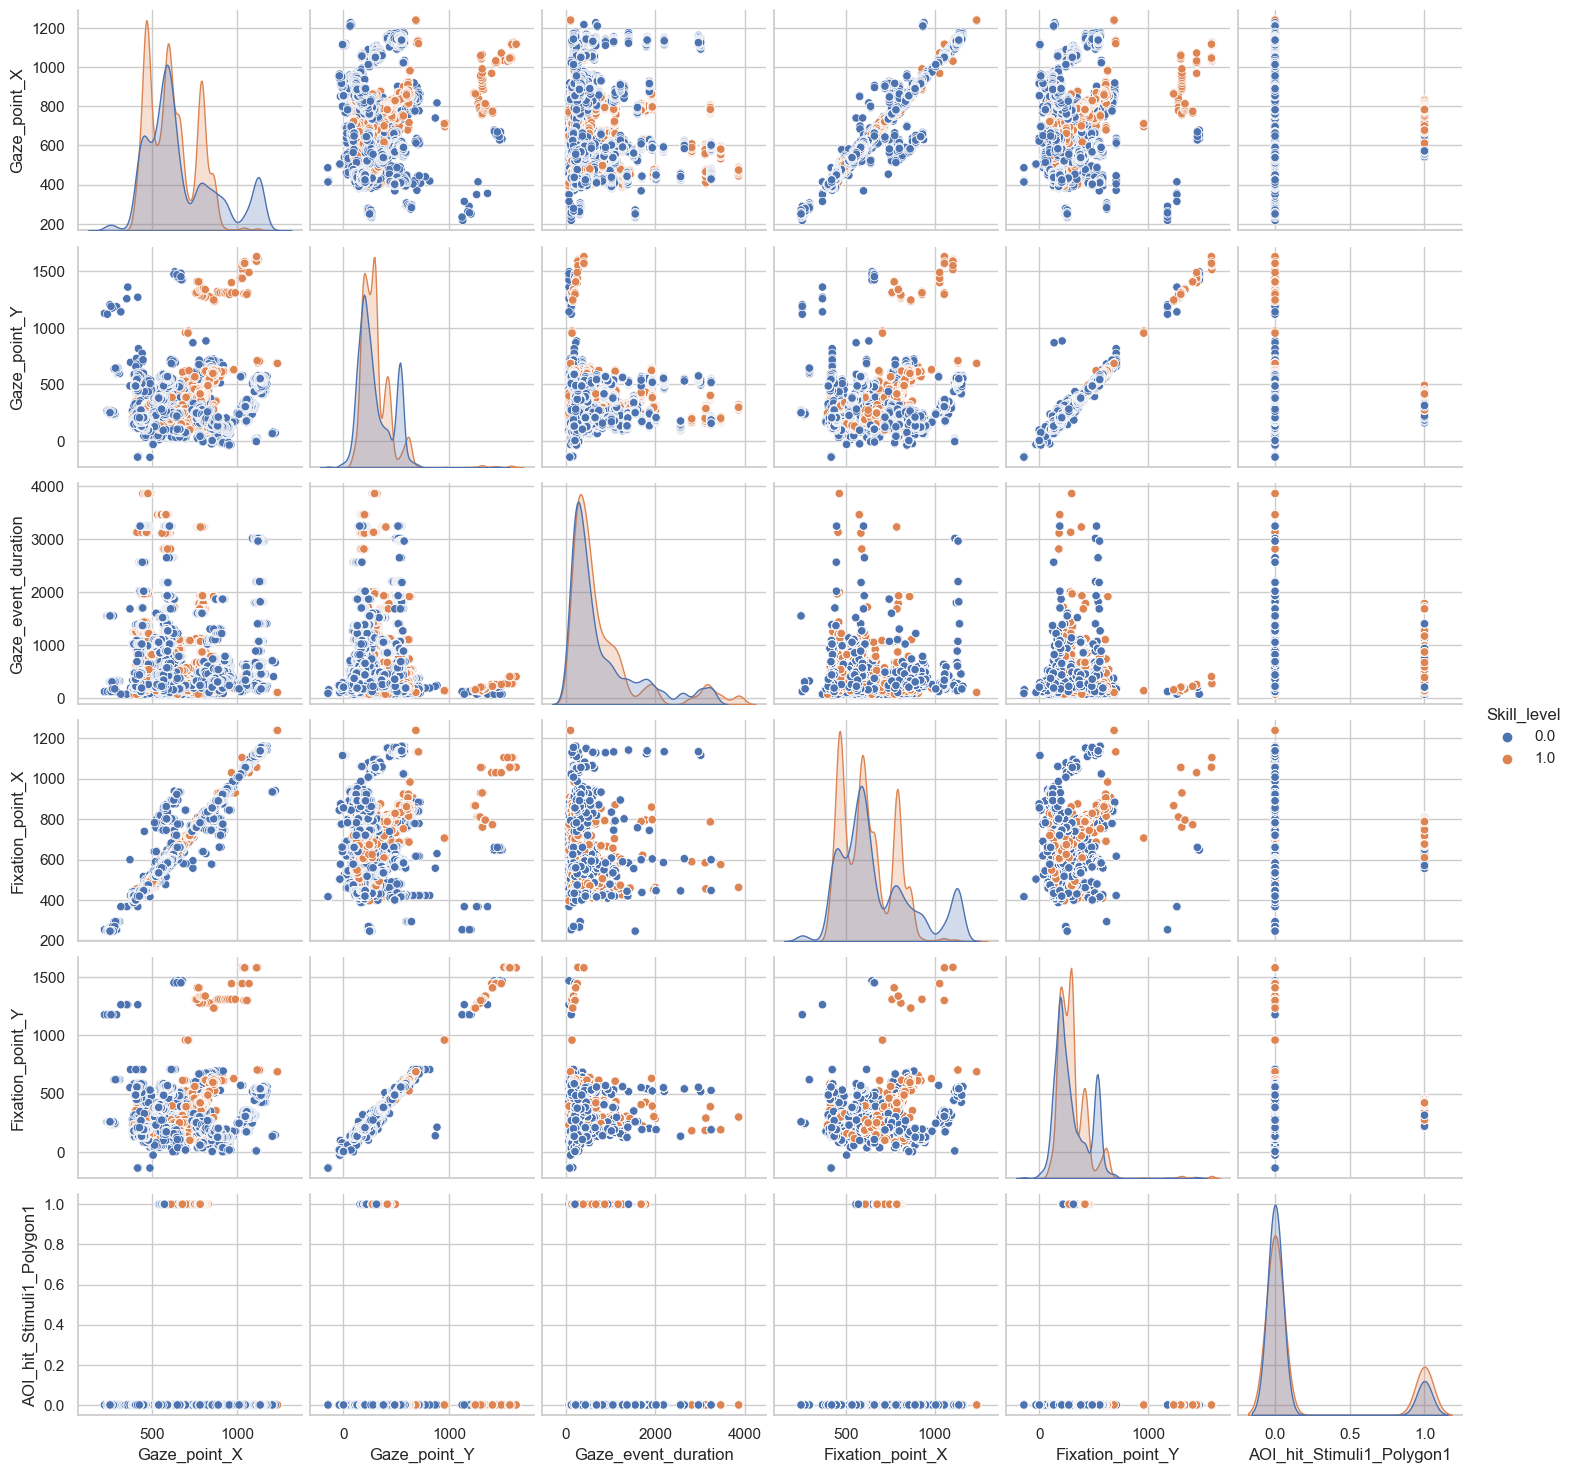

In [89]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [92]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [93]:
reg_model = LinearRegression()


In [94]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli1_Polygon1
9749,715,394,233,718,395,1
23547,1137,529,1065,1132,531,0
14035,488,250,1215,473,290,0
25569,597,539,2646,604,540,0
25923,553,374,1514,555,350,0


In [95]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_hat = reg_model.predict(X_test)

In [97]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
11556,1.0,0.464571,0.535429
13654,1.0,0.437588,0.562412
8950,0.0,0.474698,-0.474698
22803,0.0,0.441308,-0.441308
24894,0.0,0.609607,-0.609607


In [98]:
reg_model.coef_

array([ 3.31739976e-04, -9.44349633e-05,  1.14999930e-05, -8.91475655e-04,
        3.70451788e-04,  1.42915294e-01])

In [99]:
reg_model.intercept_

0.7610597877733365

In [100]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,0.0003
1,Gaze_point_Y,-0.0001
2,Gaze_event_duration,0.0000
3,Fixation_point_X,-0.0009
4,Fixation_point_Y,0.0004
5,AOI_hit_Stimuli1_Polygon1,0.1429


In [101]:
reg_model.score(X_train, y_train)

0.043908224107714

In [102]:
X_train.shape

(22451, 6)

In [103]:
adj_R2(X_train, y_train)

0.044

In [104]:
adj_R2(X_test, y_test)

0.042

In [105]:
df_predictions.head()

,actuals,predictions,resid
11556,1.0,0.464571,0.535429
13654,1.0,0.437588,0.562412
8950,0.0,0.474698,-0.474698
22803,0.0,0.441308,-0.441308
24894,0.0,0.609607,-0.609607


In [106]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.239

In [107]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.489

In [108]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [109]:
my_estimator = LinearRegression()

In [110]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [111]:
R2

array([0.04274593, 0.03714196, 0.04991356, 0.04388918, 0.04329274])

In [112]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.043

In [113]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [114]:
MSE = -NMSE
MSE

array([0.23920188, 0.24037751, 0.23715666, 0.23852456, 0.238613  ])

In [115]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.239

In [116]:
RMSE = np.sqrt(MSE)
RMSE

array([0.48908269, 0.49028309, 0.48698733, 0.48838977, 0.48848029])